# Que es una API?

Las API son mecanismos que permiten a dos componentes de software comunicarse entre sí mediante un conjunto de definiciones y protocolos. API significa “interfaz de programación de aplicaciones”. En el contexto de las API, la palabra aplicación se refiere a cualquier software con una función distinta. La interfaz puede considerarse como un contrato de servicio entre dos aplicaciones. Este contrato define cómo se comunican entre sí mediante solicitudes y respuestas.

### Solicitud de datos

La libreria requests de python nos permite realizar peticiones HTTP.

HTTP (Protocolo de transferencia de hipertexto) es un protocolo orientado a transacciones y sigue el esquema petición-respuesta entre un cliente y un servidor. Cada petición requiere de una acción (verbos: GET, PUT, POST, DELETE...)

In [5]:
import requests
import pandas as pd

In [6]:
r = requests.get('https://api.github.com/events')

#Vemos como salio todo
r.status_code

200

Códigos de retorno más comunes de HTTP:

200: La solicitud se realizó correctamente y el servidor devolvió los datos solicitados.

201 (Creado): La solicitud se realizó correctamente y el servidor creó un nuevo recurso.

204 (Sin contenido): La solicitud se realizó correctamente, pero no hay contenido que devolver.\

4xx (Error del cliente): Indica que se produjo un error en el lado del cliente.

400 (Solicitud incorrecta): La solicitud es inválida y no puede ser procesada por el servidor.


5xx (Error del servidor): Indica que se produjo un error en el lado del servidor.

500 (Error interno del servidor): El servidor encontró un error interno durante el procesamiento de la solicitud.

## Extracción de datos de NASA a través de una API

In [7]:
# Realizamos la solicitud get a la API de la NASA
r = requests.get('https://api.nasa.gov/neo/rest/v1/neo/browse/?api_key=DEMO_KEY')

r.status_code # vemos que todo salio bien 

200

In [8]:
r = requests.get('https://api.nasa.gov/neo/rest/v1/neo/browse/')

r.status_code #vemos que esta prohibido el acceso 

403

In [9]:
url = "https://api.nasa.gov/neo/rest/v1/neo/browse/"

mi_key = {'api_key': '4Qw6dtCAkjZa9G4zCnYDZeg0UjECBMcptxCHnJQt'}

response = requests.get(url, params=mi_key)

response.status_code

200

In [10]:
url = "https://api.nasa.gov/neo/rest/v1/neo/browse/"
mis_params = {'api_key': '4Qw6dtCAkjZa9G4zCnYDZeg0UjECBMcptxCHnJQt',
             'start_date': '2023-04-01',
             'end_date': '2023-04-30'}

r2 = requests.get(url, params = mis_params)

r2.status_code

200

In [11]:
dict_data = r2.json()
dict_data

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=1&size=20&api_key=4Qw6dtCAkjZa9G4zCnYDZeg0UjECBMcptxCHnJQt',
  'self': 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=0&size=20&api_key=4Qw6dtCAkjZa9G4zCnYDZeg0UjECBMcptxCHnJQt'},
 'page': {'size': 20,
  'total_elements': 32243,
  'total_pages': 1613,
  'number': 0},
 'near_earth_objects': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2000433?api_key=4Qw6dtCAkjZa9G4zCnYDZeg0UjECBMcptxCHnJQt'},
   'id': '2000433',
   'neo_reference_id': '2000433',
   'name': '433 Eros (A898 PA)',
   'name_limited': 'Eros',
   'designation': '433',
   'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433',
   'absolute_magnitude_h': 10.31,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 23.0438466577,
     'estimated_diameter_max': 51.5276075896},
    'meters': {'estimated_diameter_min': 23043.8466576534,
     'estimated_diameter_max': 51527.6075895943},
    'miles': {'estimated_diameter_min': 14.

In [12]:
dict_data.keys()

dict_keys(['links', 'page', 'near_earth_objects'])

In [13]:
data = dict_data['near_earth_objects']
data

[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2000433?api_key=4Qw6dtCAkjZa9G4zCnYDZeg0UjECBMcptxCHnJQt'},
  'id': '2000433',
  'neo_reference_id': '2000433',
  'name': '433 Eros (A898 PA)',
  'name_limited': 'Eros',
  'designation': '433',
  'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433',
  'absolute_magnitude_h': 10.31,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 23.0438466577,
    'estimated_diameter_max': 51.5276075896},
   'meters': {'estimated_diameter_min': 23043.8466576534,
    'estimated_diameter_max': 51527.6075895943},
   'miles': {'estimated_diameter_min': 14.3187780415,
    'estimated_diameter_max': 32.0177610556},
   'feet': {'estimated_diameter_min': 75603.1738682955,
    'estimated_diameter_max': 169053.8360842445}},
  'is_potentially_hazardous_asteroid': False,
  'close_approach_data': [{'close_approach_date': '1900-12-27',
    'close_approach_date_full': '1900-Dec-27 01:30',
    'epoch_date_close_approach': -21778794000

In [14]:
# pd.json_normalize : Normalize semi-structured JSON data into a flat table.
# https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html

df = pd.json_normalize(data)
df.head(3)


,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,...,orbital_data.perihelion_distance,orbital_data.perihelion_argument,orbital_data.aphelion_distance,orbital_data.perihelion_time,orbital_data.mean_anomaly,orbital_data.mean_motion,orbital_data.equinox,orbital_data.orbit_class.orbit_class_type,orbital_data.orbit_class.orbit_class_range,orbital_data.orbit_class.orbit_class_description
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.31,False,"[{'close_approach_date': '1900-12-27', 'close_...",False,...,1.133284372081002,178.9269951795186,1.782973900121676,2459802.601698595905,110.7776526746434,.5597706088868498,J2000,AMO,1.017 AU < q (perihelion) < 1.3 AU,Near-Earth asteroid orbits similar to that of ...
1,2000719,2000719,719 Albert (A911 TB),Albert,719,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000719,15.59,False,"[{'close_approach_date': '1909-08-21', 'close_...",False,...,1.194521858788897,156.2503681890173,4.079828796226027,2459956.023234763085,10.23596428095426,.2301418330768929,J2000,AMO,1.017 AU < q (perihelion) < 1.3 AU,Near-Earth asteroid orbits similar to that of ...
2,2000887,2000887,887 Alinda (A918 AA),Alinda,887,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000887,13.83,False,"[{'close_approach_date': '1910-01-04', 'close_...",False,...,1.061321201278226,350.4750169387657,3.883609286075629,2460678.792844248905,188.0405622650862,.2535179888641312,J2000,AMO,1.017 AU < q (perihelion) < 1.3 AU,Near-Earth asteroid orbits similar to that of ...


In [15]:
df.shape

(20, 44)

In [16]:
df.columns

Index(['id', 'neo_reference_id', 'name', 'name_limited', 'designation',
       'nasa_jpl_url', 'absolute_magnitude_h',
       'is_potentially_hazardous_asteroid', 'close_approach_data',
       'is_sentry_object', 'links.self',
       'estimated_diameter.kilometers.estimated_diameter_min',
       'estimated_diameter.kilometers.estimated_diameter_max',
       'estimated_diameter.meters.estimated_diameter_min',
       'estimated_diameter.meters.estimated_diameter_max',
       'estimated_diameter.miles.estimated_diameter_min',
       'estimated_diameter.miles.estimated_diameter_max',
       'estimated_diameter.feet.estimated_diameter_min',
       'estimated_diameter.feet.estimated_diameter_max',
       'orbital_data.orbit_id', 'orbital_data.orbit_determination_date',
       'orbital_data.first_observation_date',
       'orbital_data.last_observation_date', 'orbital_data.data_arc_in_days',
       'orbital_data.observations_used', 'orbital_data.orbit_uncertainty',
       'orbital_data.minimu

<AxesSubplot:>

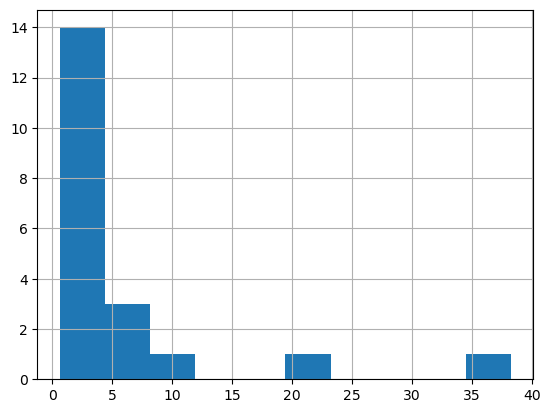

In [17]:
df['estimated_diameter.kilometers.estimated_diameter_min'].hist()

In [18]:
url = "https://api.nasa.gov/planetary/apod/"

mis_params = {
    'start_date':'2021-01-12',
    'end_date':'2021-02-12',
    'api_key': '4Qw6dtCAkjZa9G4zCnYDZeg0UjECBMcptxCHnJQt'
}

r3 = requests.get(url, params = mis_params)
r3.status_code

200

In [19]:
dict_data = r3.json()

In [20]:
df = pd.json_normalize(dict_data)
df.head(3)

,copyright,date,explanation,hdurl,media_type,service_version,title,url
0,Rodrigo Guerra,2021-01-12,The night sky is filled with stories. Cultures...,https://apod.nasa.gov/apod/image/2101/OldMan_G...,image,v1,A Historic Brazilian Constellation,https://apod.nasa.gov/apod/image/2101/OldMan_G...
1,Giulio Cobianchi,2021-01-13,What are these two giant arches across the sky...,https://apod.nasa.gov/apod/image/2101/ArcticSk...,image,v1,Arches Across an Arctic Sky,https://apod.nasa.gov/apod/image/2101/ArcticSk...
2,NaN,2021-01-14,"Like salsa verde on your favorite burrito, a g...",https://apod.nasa.gov/apod/image/2101/aurora_i...,image,v1,Aurora Slathers Up the Sky,https://apod.nasa.gov/apod/image/2101/aurora_i...


In [21]:
url = "https://api.nasa.gov/planetary/earth/imagery/"

mis_params = {
    'lon':'-101.706720',
    'lat':'21.154030',
    'date':'2019-02-01',
    'api_key': '4Qw6dtCAkjZa9G4zCnYDZeg0UjECBMcptxCHnJQt'
}

r4 = requests.get(url, params = mis_params)
r4.status_code


200

In [22]:
from PIL import Image
from io import BytesIO

ima = Image.open(BytesIO(r4.content))

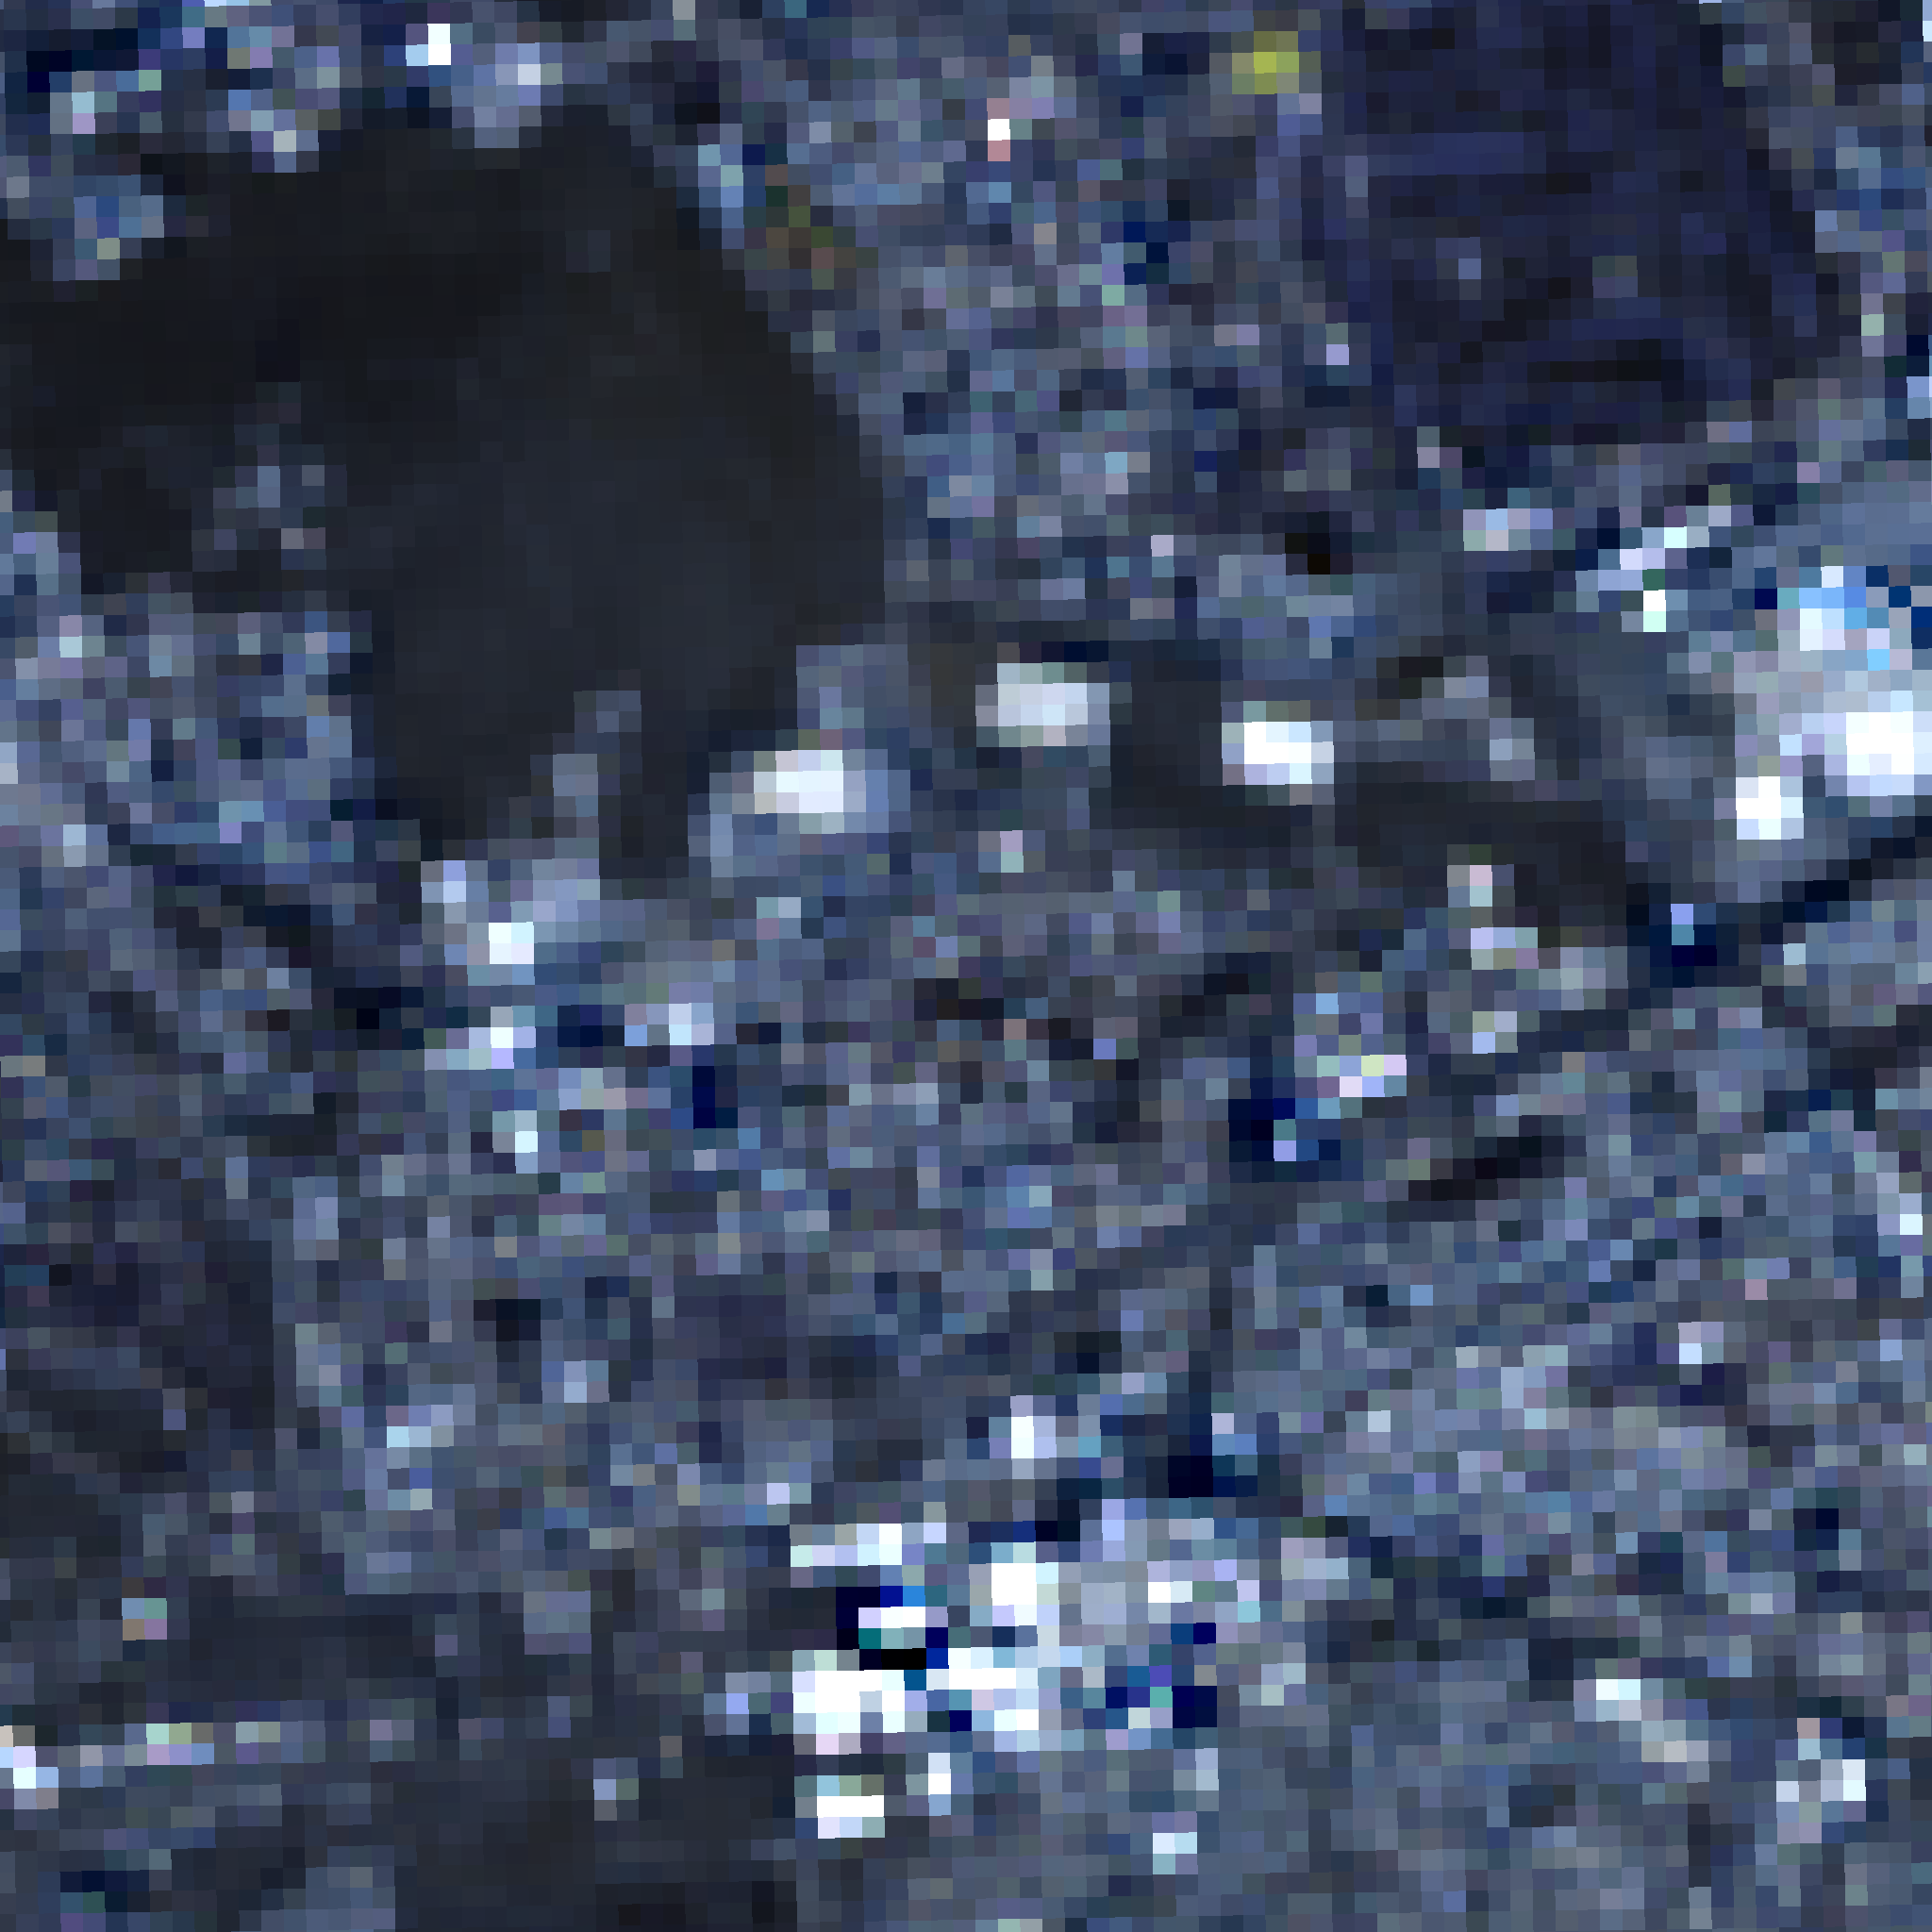

In [23]:
ima

## Extracción de datos de Wikipedia a través de una API

In [24]:
# Busqueda por titulo
url = 'https://en.wikipedia.org/w/api.php?action=query&format=json&titles=Xoloitzcuintle&prop=extracts'

request_wiki = requests.get(url)

request_wiki.status_code

200

In [25]:
request_wiki.json().keys()

dict_keys(['batchcomplete', 'warnings', 'query'])

In [26]:
request_wiki.json()['query'].keys()

dict_keys(['pages'])

In [27]:
request_wiki.json()['query']['pages'].keys()

dict_keys(['243549'])

In [28]:
request_wiki.json()['query']['pages']['243549'].keys()

dict_keys(['pageid', 'ns', 'title', 'extract'])

In [29]:
request_wiki.json()['query']['pages']['243549']

{'pageid': 243549,
 'ns': 0,
 'title': 'Xoloitzcuintle',
 'extract': '<p>The <b>Xoloitzcuintle</b> (or <b>Xoloitzquintle</b>, <b>Xoloitzcuintli</b>, or <b>Xolo</b>) is one of several breeds of hairless dog. It is found in standard, intermediate, and miniature sizes. The Xolo also comes in a coated variety, totally covered in fur. Coated and hairless can be born in the same litter as a result of the same combination of genes. The hairless variant is known as the <b>Perro pelón mexicano</b> or <b>Mexican hairless dog</b>. It is characterized by its duality, wrinkles, and dental abnormalities, along with a primitive temper. In Nahuatl, from which its name originates, it is <i>xōlōitzcuintli</i> <small></small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nah-Latn-fonipa">[ʃoːloːit͡sˈkʷint͡ɬi]</span> (singular) and <i>xōlōitzcuintin</i> <small></small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nah-Latn-fonipa">[ʃoːloːit

In [30]:
df = pd.json_normalize(request_wiki.json()['query']['pages']['243549'])
df

,pageid,ns,title,extract
0,243549,0,Xoloitzcuintle,<p>The <b>Xoloitzcuintle</b> (or <b>Xoloitzqui...


In [31]:
df['extract'][0]

'<p>The <b>Xoloitzcuintle</b> (or <b>Xoloitzquintle</b>, <b>Xoloitzcuintli</b>, or <b>Xolo</b>) is one of several breeds of hairless dog. It is found in standard, intermediate, and miniature sizes. The Xolo also comes in a coated variety, totally covered in fur. Coated and hairless can be born in the same litter as a result of the same combination of genes. The hairless variant is known as the <b>Perro pelón mexicano</b> or <b>Mexican hairless dog</b>. It is characterized by its duality, wrinkles, and dental abnormalities, along with a primitive temper. In Nahuatl, from which its name originates, it is <i>xōlōitzcuintli</i> <small></small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nah-Latn-fonipa">[ʃoːloːit͡sˈkʷint͡ɬi]</span> (singular) and <i>xōlōitzcuintin</i> <small></small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nah-Latn-fonipa">[ʃoːloːit͡sˈkʷintin]</span> (plural). The name comes from the god <i>Xolotl</i

In [32]:

df = pd.json_normalize(request_wiki.json()['query'])
df['pages.243549.extract'][0]

'<p>The <b>Xoloitzcuintle</b> (or <b>Xoloitzquintle</b>, <b>Xoloitzcuintli</b>, or <b>Xolo</b>) is one of several breeds of hairless dog. It is found in standard, intermediate, and miniature sizes. The Xolo also comes in a coated variety, totally covered in fur. Coated and hairless can be born in the same litter as a result of the same combination of genes. The hairless variant is known as the <b>Perro pelón mexicano</b> or <b>Mexican hairless dog</b>. It is characterized by its duality, wrinkles, and dental abnormalities, along with a primitive temper. In Nahuatl, from which its name originates, it is <i>xōlōitzcuintli</i> <small></small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nah-Latn-fonipa">[ʃoːloːit͡sˈkʷint͡ɬi]</span> (singular) and <i>xōlōitzcuintin</i> <small></small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nah-Latn-fonipa">[ʃoːloːit͡sˈkʷintin]</span> (plural). The name comes from the god <i>Xolotl</i

In [33]:
buscar_titulo = 'Xoloitzcuintle'
 
#endpoint = 'https://es.wikipedia.org/w/api.php'
endpoint = 'https://en.wikipedia.org/w/api.php'

params = {
            'action' : 'query',
            'format' : 'json',
            'titles' : buscar_titulo, 
            'prop' : 'extracts'
        }

request2_wiki = requests.get(endpoint, params=params)

request2_wiki.status_code

200

In [35]:
df = pd.json_normalize(request2_wiki.json()['query'])
df

,pages.243549.pageid,pages.243549.ns,pages.243549.title,pages.243549.extract
0,243549,0,Xoloitzcuintle,<p>The <b>Xoloitzcuintle</b> (or <b>Xoloitzqui...


Restringir la búsqueda:

    exintro : solo el resumen
    
    exchars : número de caracteres
    
    exsentences : número de oraciones
    
    explaintext : texto plano (no HTML)


In [36]:
buscar_titulo = 'Xoloitzcuintle'
 
#endpoint = 'https://es.wikipedia.org/w/api.php'
endpoint = 'https://en.wikipedia.org/w/api.php'


params = {
            'action' : 'query',
            'format' : 'json',
            'titles' : buscar_titulo, 
            'prop' : 'extracts',
            'exintro': True,
            'explaintext': True
        }

request3_wiki = requests.get(endpoint, params=params)

request3_wiki.status_code


200

In [37]:
df = pd.json_normalize(request3_wiki.json()['query'])
resumen_xolo = df['pages.243549.extract'][0]

In [38]:
resumen_xolo

"The Xoloitzcuintle (or Xoloitzquintle, Xoloitzcuintli, or Xolo) is one of several breeds of hairless dog. It is found in standard, intermediate, and miniature sizes. The Xolo also comes in a coated variety, totally covered in fur. Coated and hairless can be born in the same litter as a result of the same combination of genes. The hairless variant is known as the Perro pelón mexicano or Mexican hairless dog. It is characterized by its duality, wrinkles, and dental abnormalities, along with a primitive temper. In Nahuatl, from which its name originates, it is xōlōitzcuintli [ʃoːloːit͡sˈkʷint͡ɬi] (singular) and xōlōitzcuintin [ʃoːloːit͡sˈkʷintin] (plural). The name comes from the god Xolotl that, according to ancient narratives, is its creator and itzcuīntli [it͡sˈkʷiːnt͡ɬi], meaning 'dog' in the Nahuatl language.\n\n"

### Búsqueda por palabra en título

In [39]:
buscar_en_titulo = 'Leon'
 
endpoint = 'https://es.wikipedia.org/w/api.php'

params = {
            'action' : 'query',
            'format' : 'json',
            'list':'search',
            'srsearch' : buscar_en_titulo
        }

request4_wiki = requests.get(endpoint, params=params)

request4_wiki.status_code

200

In [40]:
# request4_wiki.json()['query']['search']
df = pd.json_normalize(request4_wiki.json()['query']['search'])
df

,ns,title,pageid,size,wordcount,snippet,timestamp
0,0,LEON,766618,1824,161,"<span class=""searchmatch"">LEON</span> es un nú...",2022-12-13T14:18:14Z
1,0,Panthera leo,25116,146793,17903,"El <span class=""searchmatch"">león</span> (Pant...",2023-04-25T08:50:13Z
2,0,Léon,232172,31324,3716,"<span class=""searchmatch"">Léon</span>, también...",2023-03-04T18:05:25Z
3,0,León (España),3341,233782,25540,"<span class=""searchmatch"">León</span> (en <spa...",2023-04-26T19:37:44Z
4,0,Castilla y León,485,193791,20392,"Castilla y <span class=""searchmatch"">León</spa...",2023-05-07T07:47:36Z
5,0,León (heráldica),1743552,18355,949,"En Heráldica el <span class=""searchmatch"">León...",2023-05-01T17:22:17Z
6,0,Nuevo León,25593,119632,9564,"Nuevo <span class=""searchmatch"">León</span> ( ...",2023-04-25T03:30:11Z
7,0,Provincia de León,23530,161746,16488,"<span class=""searchmatch"">León</span> (en <spa...",2023-04-08T08:59:03Z
8,0,Reino de León,41339,32095,3709,"El reino de <span class=""searchmatch"">León</sp...",2023-04-27T03:14:13Z
9,0,León de Los Aldama,66887,162208,20499,"<span class=""searchmatch"">León</span> de los A...",2023-04-26T14:12:31Z


## API REST

Una API REST (Representational State Transfer) es un estilo arquitectónico para el diseño de sistemas de comunicación en la web. Es un conjunto de principios y restricciones que permiten la interoperabilidad entre sistemas distribuidos.

In [41]:
buscar_en_titulo = 'Leon'
 
endpoint = 'https://es.wikipedia.org/w/rest.php/v1/search/title'

params = {
            'q' : buscar_en_titulo,
            'limit': 10
        }

request5_wiki = requests.get(endpoint, params=params)

request5_wiki.status_code

200

In [42]:
df = pd.json_normalize(request5_wiki.json()['pages'])
df

,id,key,title,excerpt,matched_title,description,thumbnail.mimetype,thumbnail.size,thumbnail.width,thumbnail.height,thumbnail.duration,thumbnail.url
0,25116,Panthera_leo,Panthera leo,Leon,Leon,mamífero carnívoro de la familia de los félidos,image/jpeg,None,60,45,None,//upload.wikimedia.org/wikipedia/commons/thumb...
1,7236,Leonardo_da_Vinci,Leonardo da Vinci,Leonardo da Vinci,None,polímata italiano,image/jpeg,None,60,94,None,//upload.wikimedia.org/wikipedia/commons/thumb...
2,7057,Leonhard_Euler,Leonhard Euler,Leonhard Euler,None,matemático nacido en Suiza,image/jpeg,None,60,75,None,//upload.wikimedia.org/wikipedia/commons/thumb...
3,218655,Leonardo_DiCaprio,Leonardo DiCaprio,Leonardo DiCaprio,None,actor y productor cinematográfico estadounidense,image/jpeg,None,60,95,None,//upload.wikimedia.org/wikipedia/commons/thumb...
4,74170,Leonid_Brézhnev,Leonid Brézhnev,Leonid Brézhnev,None,político soviético,image/jpeg,None,60,84,None,//upload.wikimedia.org/wikipedia/commons/thumb...
5,66278,Leonel_Fernández,Leonel Fernández,Leonel Fernández,None,"político, escritor y abogado dominicano",image/jpeg,None,60,76,None,//upload.wikimedia.org/wikipedia/commons/thumb...
6,220964,Leonor_de_Borbón,Leonor de Borbón,Leonor de Borbón,None,XXXVII Princesa de Asturias (2014-presente).,image/jpeg,None,60,80,None,//upload.wikimedia.org/wikipedia/commons/thumb...
7,468925,Leonardo_Favio,Leonardo Favio,Leonardo Favio,None,artista argentino,image/jpeg,None,60,82,None,//upload.wikimedia.org/wikipedia/commons/thumb...
8,527170,Leonel_Álvarez,Leonel Álvarez,Leonel Álvarez,None,futbolista colombiano,image/jpeg,None,60,97,None,//upload.wikimedia.org/wikipedia/commons/thumb...
9,82604,Leonard_Cohen,Leonard Cohen,Leonard Cohen,None,"Poeta, escritor y cantautor canadiense",image/jpeg,None,60,89,None,//upload.wikimedia.org/wikipedia/commons/thumb...


In [43]:
buscar_titulo = 'Xoloitzcuintle'
 
endpoint = 'https://en.wikipedia.org/w/rest.php/v1/page/' + buscar_titulo

request6_wiki = requests.get(endpoint)

request6_wiki.status_code

200

In [44]:
request6_wiki.json().keys()

dict_keys(['id', 'key', 'title', 'latest', 'content_model', 'license', 'source'])

In [45]:
df = pd.json_normalize(request6_wiki.json())
df

,id,key,title,content_model,source,latest.id,latest.timestamp,license.url,license.title
0,243549,Xoloitzcuintle,Xoloitzcuintle,wikitext,{{Distinguish|Peruvian Hairless Dog}}\n{{Infob...,1151072372,2023-04-21T18:26:22Z,https://creativecommons.org/licenses/by-sa/3.0/,Creative Commons Attribution-Share Alike 3.0
